In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv("winequality-red.csv")

<h3>Linear Regression</h3>

In [7]:
from sklearn.linear_model import LinearRegression as LR
reg = LR()

In [8]:
conditions = [
    (df["quality"]>=7),
    (df["quality"]<=4)
]
rating = ["superb","poor"]
df["rating"] = np.select(conditions,rating,default="fine")

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,fine
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,fine
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,fine
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,fine
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,fine


In [10]:
reg.fit(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']],df.quality)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
reg.coef_

array([ 2.49905527e-02, -1.08359026e+00, -1.82563948e-01,  1.63312698e-02,
       -1.87422516e+00,  4.36133331e-03, -3.26457970e-03, -1.78811638e+01,
       -4.13653144e-01,  9.16334413e-01,  2.76197699e-01])

In [12]:
reg.intercept_

21.96520844944809

<h3>plot of alcohol content vs quality<h3>

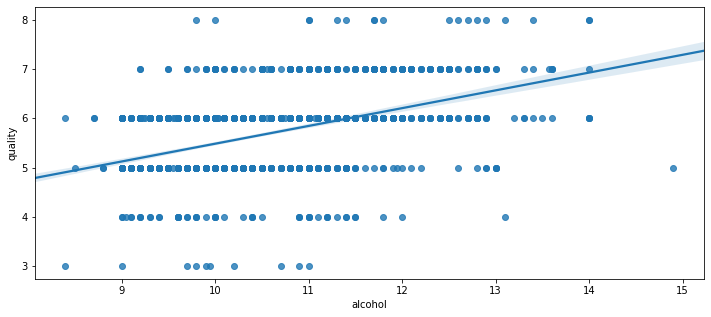

In [13]:
width=12
height=5

plt.figure(figsize=(width,height))
sns.regplot(x="alcohol",y="quality",data=df)

<h3>Ridge_and_Lasso Regression<h3>

In [14]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split 

In [15]:
x = df[df.columns[:-1]] 
y = df[df.columns[-1]]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [16]:
rr = Ridge(alpha = 0.01).fit(x_train, y_train)
print(rr.score(x_train,y_train))
print(rr.score(x_test,y_test))

ValueError: could not convert string to float: 'superb'

In [ ]:
lasso = Lasso(alpha = 0.01).fit(x_train,y_train)
print(lasso.score(x_train,y_train))
print(lasso.score(x_test,y_test))

<h3>Choosing best n for knn classification<h3>

In [17]:
from sklearn.neighbors import KNeighborsClassifier 

In [18]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [19]:
knn.score(x_test, y_test)

0.846875

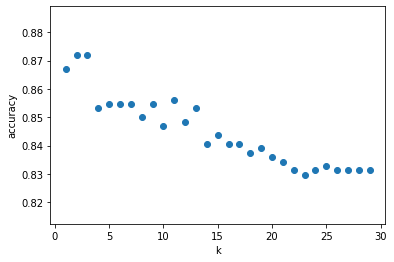

In [20]:
k_range = range(1,30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30]);
plt.show()

<h3>Classification report<h3>

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
y_prediction = knn.predict(x_test)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

        fine       0.83      1.00      0.91       529
        poor       0.00      0.00      0.00        27
      superb       1.00      0.04      0.07        84

    accuracy                           0.83       640
   macro avg       0.61      0.35      0.33       640
weighted avg       0.82      0.83      0.76       640



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3>Confusion matrix<h3>

In [28]:
conf_matr = confusion_matrix(y_test, y_prediction)
print("KNN Classifier(Confusion Matrix):\n", conf_matr)

KNN Classifier(Confusion Matrix):
 [[529   0   0]
 [ 27   0   0]
 [ 81   0   3]]
